<a href="https://colab.research.google.com/github/Nishant-codex/single_cell_analysis/blob/main/notebooks/Impedance_clustering_for_drug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I have tried to summarize the findings with the FN protocol in this notebook. Here, I take the FN subthreshold voltage and input current and calculate the impedance on it. I have plotted imedance for Serotonin, Dopamine and aCSF

## all imports and functions 

In [1]:
#@title imports 
import os
import pickle
from typing import Set
# from jedi import settings
import matplotlib 
import numpy as np 
import matplotlib.pyplot as plt
from numpy.lib.function_base import append 
import scipy.io as spio
from scipy.io import loadmat, savemat
import importlib.util
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from scipy.sparse import data 

import pandas as pd 
import matplotlib as mpl 
import seaborn as sns 
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.decomposition import SparsePCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import os 
import sys 

sys.path.append('C:/Users/Nishant Joshi/Downloads/Old_code/repo/single_cell_analysis/scripts')

from utils import *
from UMAP_utils import *  
from plot_utils import * 

In [2]:
sys.path.append(os.getcwd()+'/../scripts')

In [3]:
from impedance import *
from neuromod_utils import *
from utils import *

In [4]:
timelen =0.01
adcrate  = 20001
NFFT = timelen * adcrate

NFFT2 = int(np.floor(NFFT/2))
NFFT = int(2 * NFFT2)
# (0:(1/timelen):(NFFT2-1)/timelen)'
fas = np.arange(0, (NFFT2-1)/timelen, (1/timelen))


## Get Data for impedance

In [5]:
imp_data = pd.read_pickle("D:/CurrentClamp/Impedance.pkl")

In [65]:
def normalizeBytheFirstValue(data_matrix):
    npmat = np.array(data_matrix)
    firstVal = npmat[0,:]
    print(len(npmat[:,0]))
    return npmat *     np.repeat([1/firstVal],len(npmat[:,0]),axis=0)

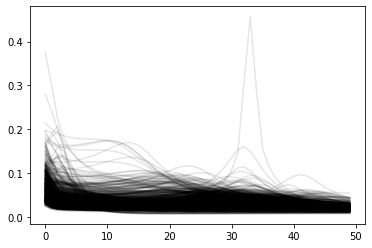

In [59]:
plt.plot( np.vstack(imp_data['impedance'].to_numpy()).T[:50,:],c='black',alpha=0.1)
plt.show()

In [8]:
drugs = ['dopamine',
 'sag',
 'cirazoline',
 'm1-ago+ant',
 'd1',
 'm1-ago',
 'm1-ant',
 'd2']

## Visualize impedance for each drug against acsf

99
99


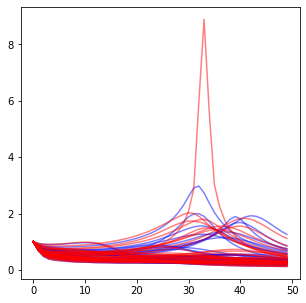

99
99


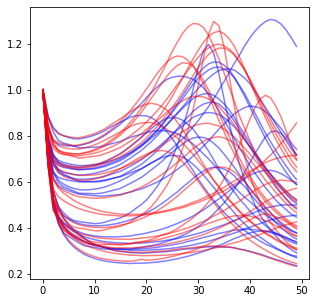

99
99


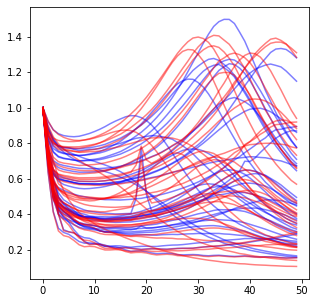

99
99


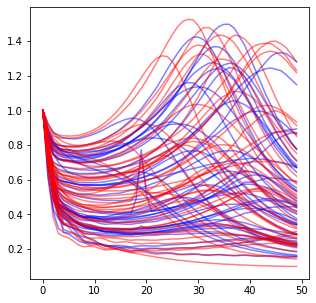

99
99


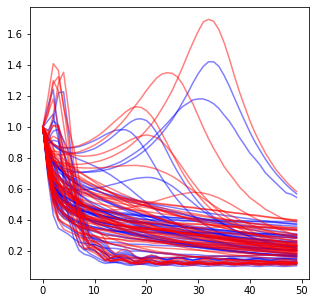

99
99


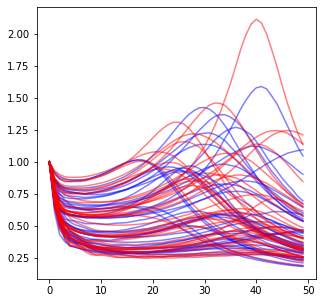

99
99


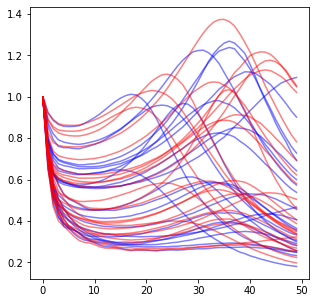

99
99


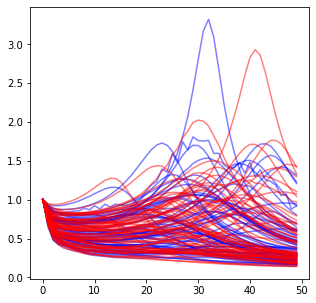

In [66]:
# Imp_norm = normalizeBytheFirstValue(np.vstack(Imp_data_acsf['impedance']).T)[:50]
for i in drugs:
    data_acsf,data_drug = return_acsf_and_drug(imp_data,cond=[i],joint=False)
    data_acsf = data_acsf.drop_duplicates('exp_name')  
    data_drug = data_drug.drop_duplicates('exp_name')  

    data_acsf = normalizeBytheFirstValue(np.vstack(data_acsf['impedance']).T)[:50]
    data_drug = normalizeBytheFirstValue(np.vstack(data_drug['impedance']).T)[:50]

    # neuromod_list = neumericalize_neurmods(data,)

    fig,ax = plt.subplots(1,figsize=[5,5])
    freq = fas
    plt.plot(freq[:50]/100, data_acsf,c='b',alpha=0.5)
    plt.plot(freq[:50]/100, data_drug,c='red',alpha=0.5)

    plt.show()



## Plot Manifolds for drug

dopamine


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


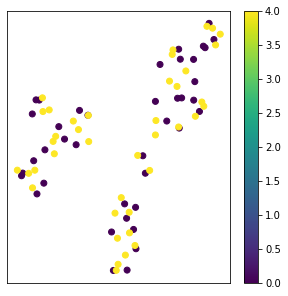

sag


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


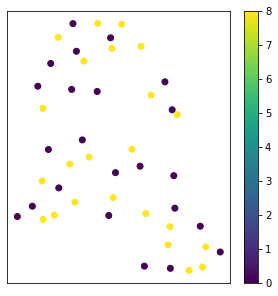

cirazoline


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


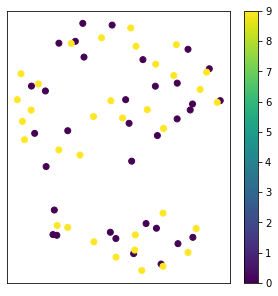

m1-ago+ant


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


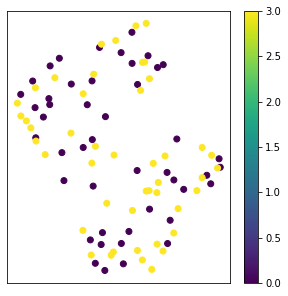

d1


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


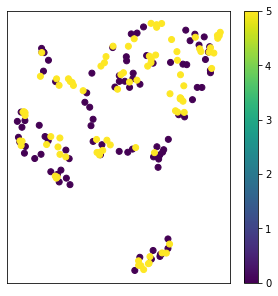

m1-ago


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


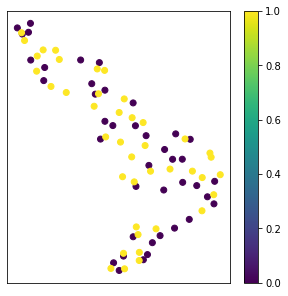

m1-ant


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


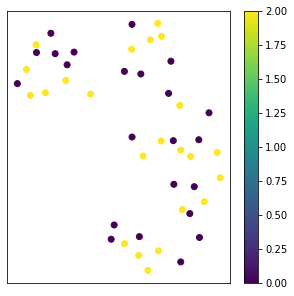

d2


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


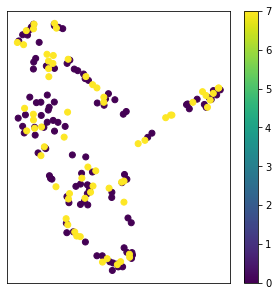

In [67]:
for i in drugs:
    print(i)
    data = return_acsf_and_drug(imp_data,cond=[i],joint=True)
    neuromod_list =  neumericalize_neurmods(data)
    plot_UMAP_values(np.vstack(data.impedance),neuromod_list,random_state=42,save=False,figsize=[5,5])
    plt.show()

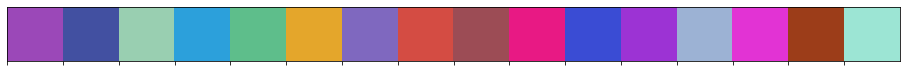

In [73]:
coherence_colors = [[0.609, 0.283, 0.724],
                    [0.259,	0.314, 0.635],
                    [0.6,	0.812, 0.698],
                    [0.176,	0.631, 0.859],
                    [0.369,	0.749, 0.549],
                    [0.898,	0.654, 0.169],
                    [0.5,	0.41 , 0.75],
                    [0.834,	0.3 , 0.265],
                    [0.612,	0.3 , 0.334],
                    [0.912,	0.1 , 0.52],
                    [0.23,	0.3 , 0.834],
                    [0.612,	0.2 , 0.834],
                    [0.612,	0.7 , 0.834],
                    [0.89,	0.2 , 0.834],
                    [0.612,	0.24 , 0.1],
                    [0.612,	0.9 , 0.834]]

sns.palplot(coherence_colors)

## Plot clusters 

In [68]:
exc_imp = imp_data[imp_data.ei_labels==1]
inh_imp = imp_data[imp_data.ei_labels==0]

In [69]:
from neuromod_utils import heterogeniety_for_drug 

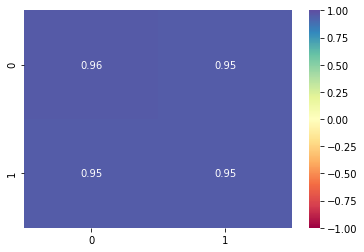

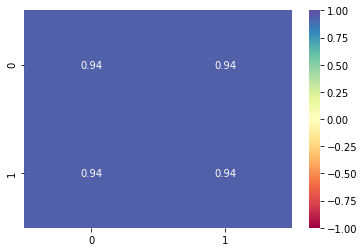

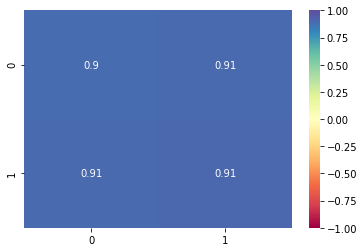

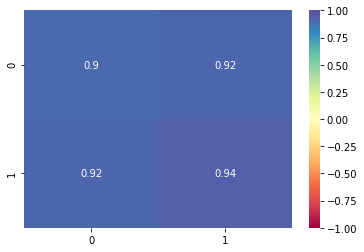

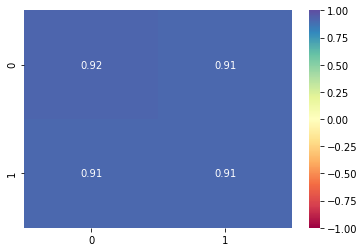

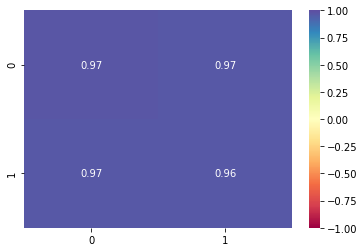

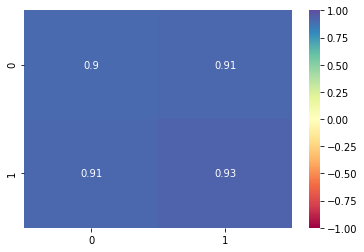

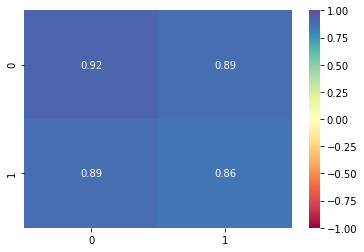

In [70]:
for cond in ['d1','d2','m1-ago','m1-ago+ant']:
    df_temp  = return_acsf_and_drug(imp_data,cond=[cond],joint=True)
    df_temp_exc = df_temp[df_temp.ei_labels==1]
    df_temp_inh = df_temp[df_temp.ei_labels==0]

    heterogeniety_for_drug(df_temp_exc,cond=cond,cols='impedance')
    plt.show()
    heterogeniety_for_drug(df_temp_inh,cond=cond,cols='impedance')
    plt.show()

['d1', 'd2', 'm1-ago', 'm1-ant', 'm1-ago+ant']

## Inhibitory Clusters

d1 drug:36 acsf:36


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


3


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


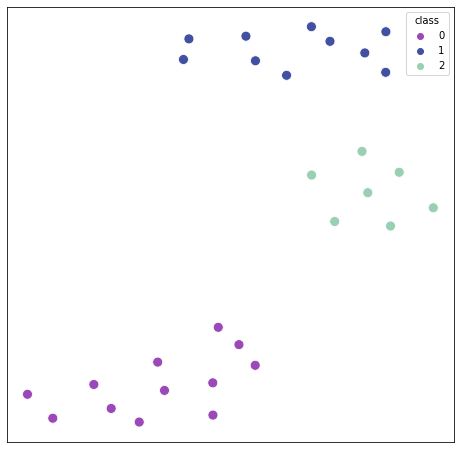

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


3


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


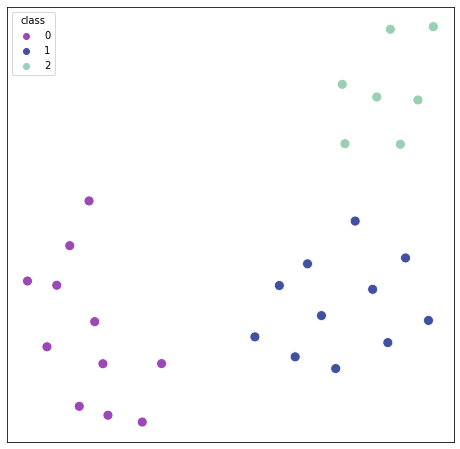

d2 drug:19 acsf:26


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


3


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


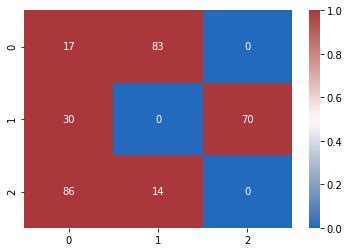

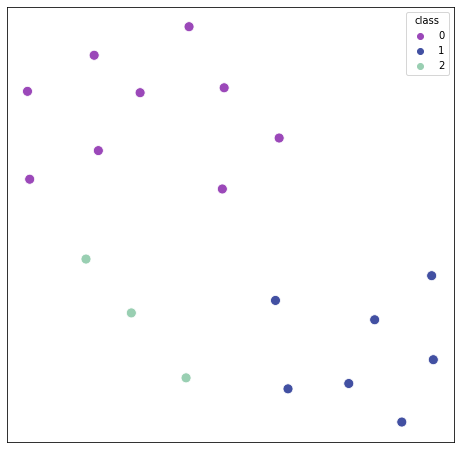

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


2


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


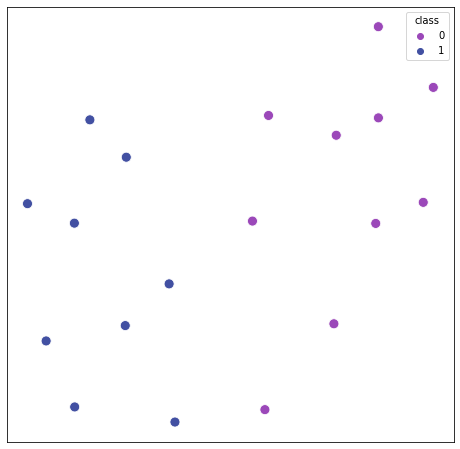

m1-ago drug:22 acsf:22


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


3


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


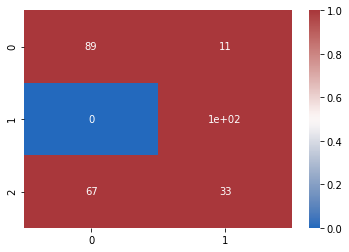

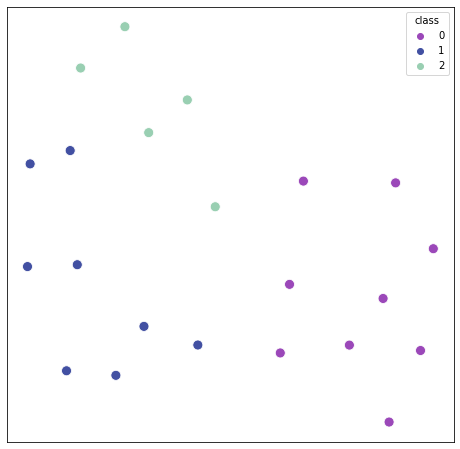

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


3


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


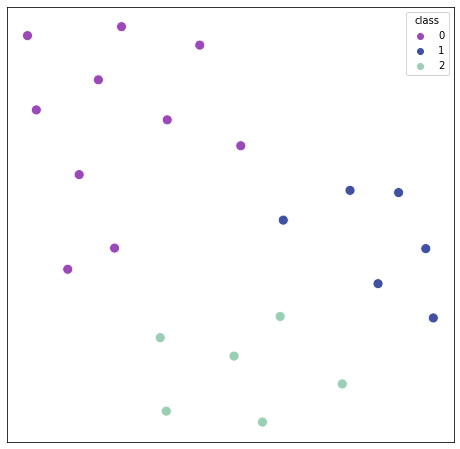

m1-ant drug:12 acsf:12


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


2


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


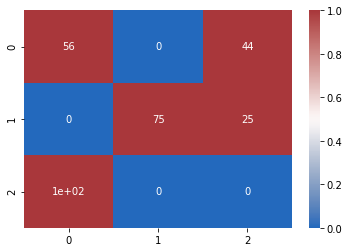

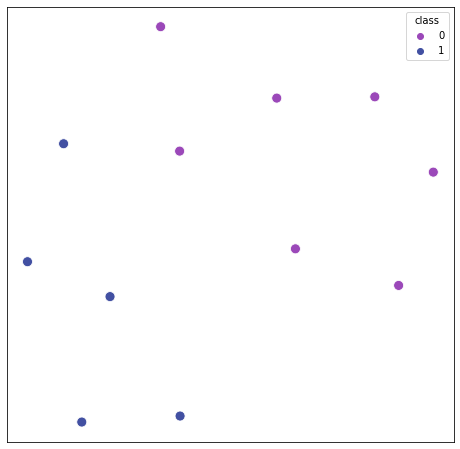

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


2


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


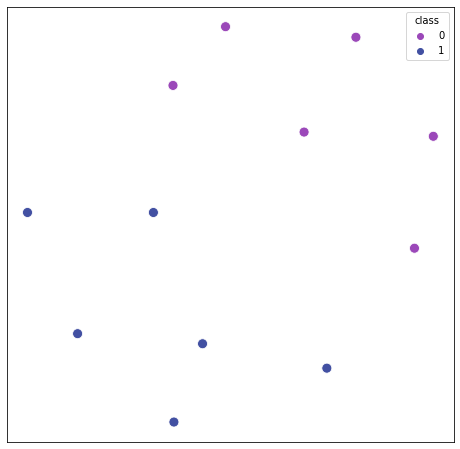

m1-ago+ant drug:22 acsf:17


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


3


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


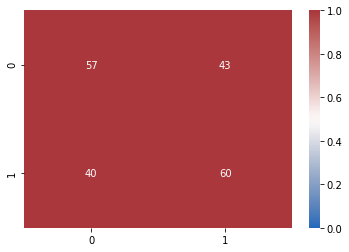

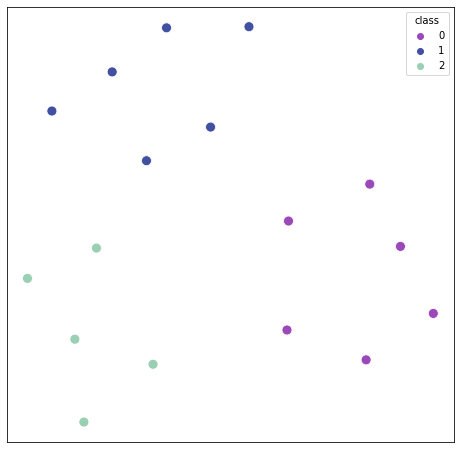

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


3


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


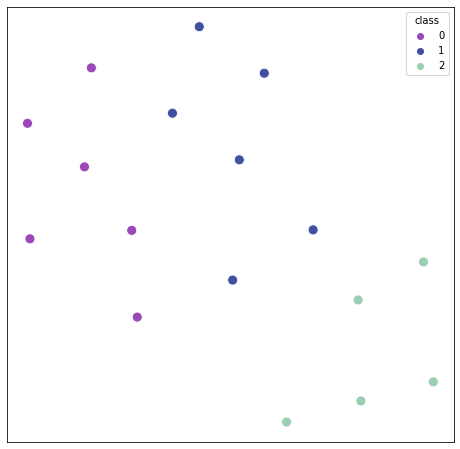

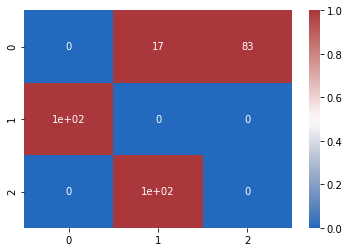

In [137]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from plot_utils import * 
adj_rand_score_inh = {}
adj_MI_inh = {}
for drug in ['d1',  'd2' , 'm1-ago', 'm1-ant','m1-ago+ant', ]:
    data_acsf,data_drug = return_acsf_and_drug(inh_imp,cond=[drug],joint=False)
    print(drug, 'drug'+':'+str(len(data_drug)), 'acsf'+':'+str(len(data_acsf)))
    data_acsf = data_acsf.drop_duplicates('exp_name')
    data_drug = data_drug.drop_duplicates('exp_name')
    common_exps = set(data_acsf.exp_name) & set(data_drug.exp_name)
    data_acsf = data_acsf[data_acsf.exp_name.isin(common_exps)]  
    data_drug = data_acsf[data_acsf.exp_name.isin(common_exps)]  

    # plot_UMAP_values(np.vstack(data.impedance),neuromod_list,random_state=42,save=False,figsize=[5,5])
    labels_acsf,mapper,reducer = plot_UMAP_clusters_single(normalize(np.vstack(data_acsf.impedance)),20,0.1,1.,42,c_list=coherence_colors,size=100)

    # plt.show()
    labels_drug,mapper,reducer = plot_UMAP_clusters_single(np.vstack(data_drug.impedance),20,0.1,1.,42,c_list=coherence_colors,size=100)
    # plt.show()
    data_drug['labels_drug'] = labels_drug
    data_acsf['labels_acsf'] = labels_acsf

    adj_rand_score_inh[drug] = adjusted_rand_score(labels_acsf,labels_drug)
    adj_MI_inh[drug] =  adjusted_mutual_info_score(labels_acsf,labels_drug)
    return_confusion_matrix_(data_acsf,data_drug,'labels_acsf','labels_drug',shuffle=False,cmap='vlag',vmin=0,vmax=1,figsize=[6,5],save=False,)

In [138]:
print(adj_rand_score_inh)
print(adj_MI_inh)

{'d1': 0.47699254785716266, 'd2': 0.5128205128205128, 'm1-ago': 0.3561044641708478, 'm1-ant': -0.0664819944598338, 'm1-ago+ant': 0.8229166666666666}
{'d1': 0.5043319384374939, 'd2': 0.4593793337402882, 'm1-ago': 0.49145088755946764, 'm1-ant': -0.05368169189192563, 'm1-ago+ant': 0.8318580869701266}


## Excitatory clusters

d1 drug:51 acsf:56


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


3


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


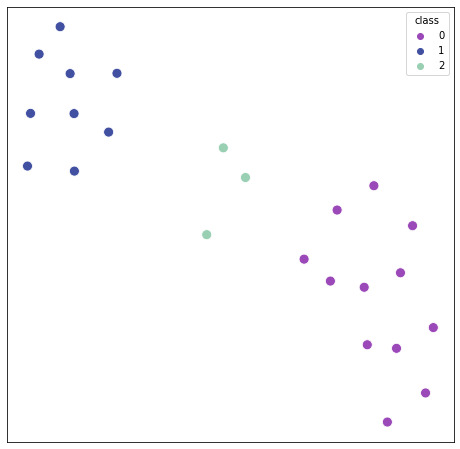

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


3


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


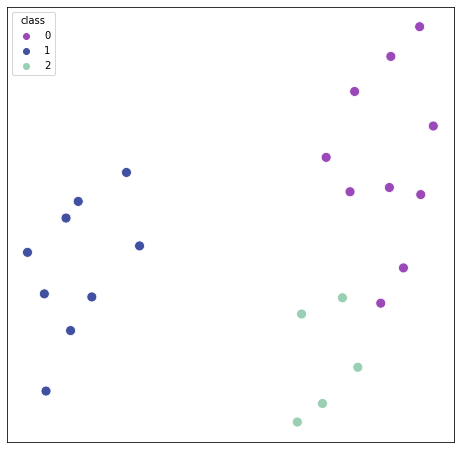

d2 drug:47 acsf:77


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


4


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


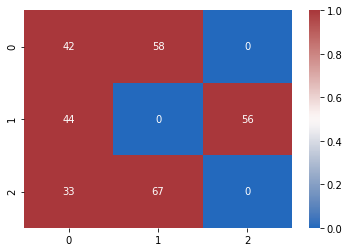

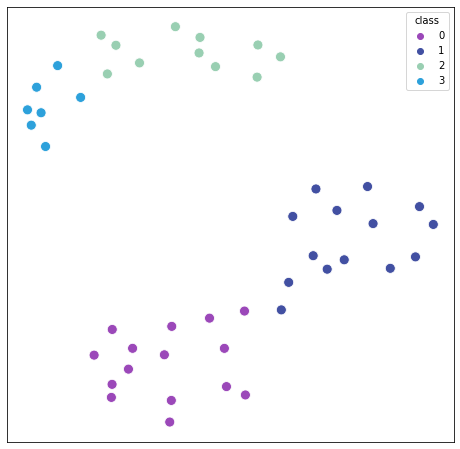

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


5


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


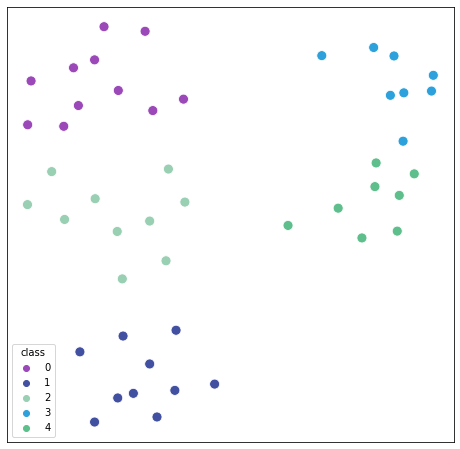

m1-ago drug:19 acsf:19


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


2


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


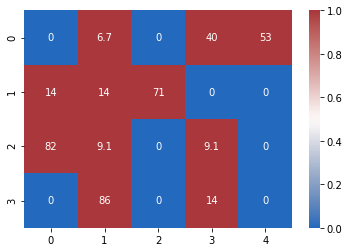

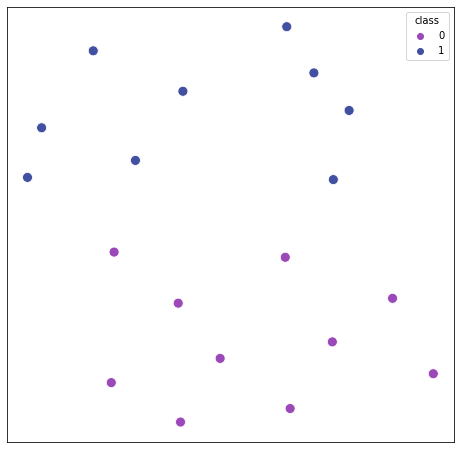

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


3


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


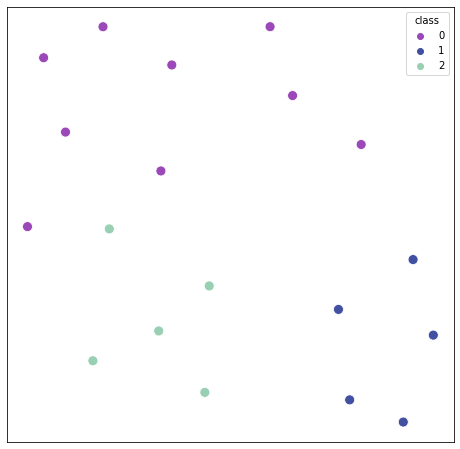

m1-ant drug:11 acsf:11


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


2


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


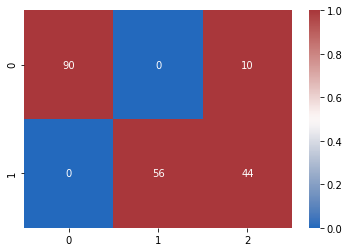

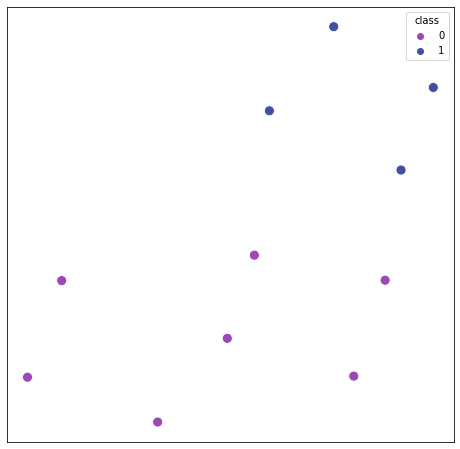

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


3


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


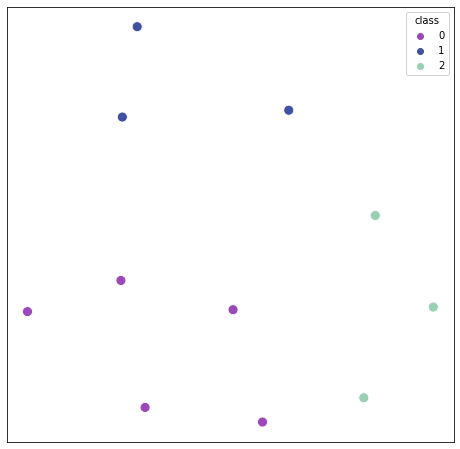

m1-ago+ant drug:22 acsf:16


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


3


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


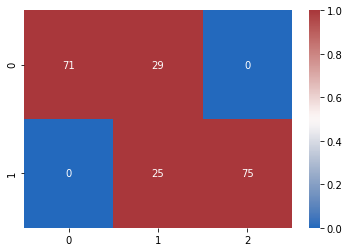

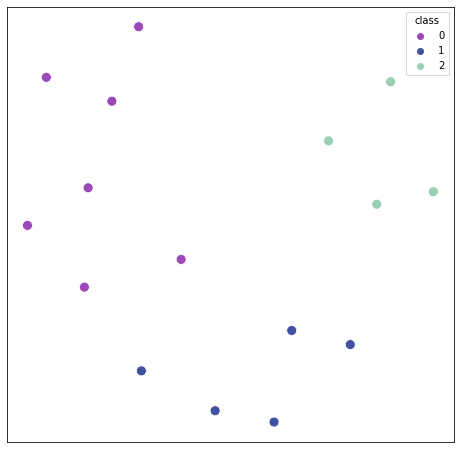

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


4


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


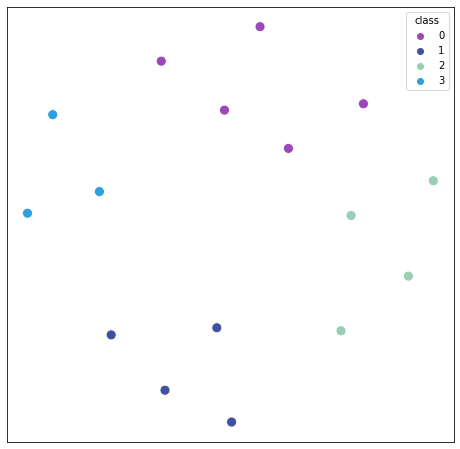

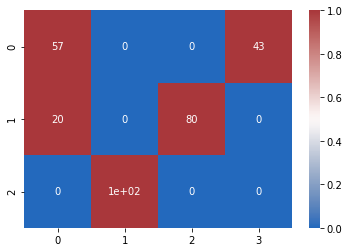

In [139]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

adj_rand_score_exc = {}
adj_MI_exc = {}
for drug in ['d1',  'd2' , 'm1-ago', 'm1-ant','m1-ago+ant', ]:
    data_acsf,data_drug = return_acsf_and_drug(exc_imp,cond=[drug],joint=False)
    print(drug, 'drug'+':'+str(len(data_drug)), 'acsf'+':'+str(len(data_acsf)))
    data_acsf = data_acsf.drop_duplicates('exp_name')
    data_drug = data_drug.drop_duplicates('exp_name')
    common_exps = set(data_acsf.exp_name) & set(data_drug.exp_name)
    data_acsf = data_acsf[data_acsf.exp_name.isin(common_exps)]  
    data_drug = data_acsf[data_acsf.exp_name.isin(common_exps)]  

    # plot_UMAP_values(np.vstack(data.impedance),neuromod_list,random_state=42,save=False,figsize=[5,5])
    labels_acsf,mapper,reducer = plot_UMAP_clusters_single(normalize(np.vstack(data_acsf.impedance)),20,0.1,1.,42,c_list=coherence_colors,size=100)

    # plt.show()
    labels_drug,mapper,reducer = plot_UMAP_clusters_single(np.vstack(data_drug.impedance),20,0.1,1.,42,c_list=coherence_colors,size=100)
    # plt.show()
    data_drug['labels_drug'] = labels_drug
    data_acsf['labels_acsf'] = labels_acsf

    adj_rand_score_exc[drug] = adjusted_rand_score(labels_acsf,labels_drug)
    adj_MI_exc[drug] =  adjusted_mutual_info_score(labels_acsf,labels_drug)
    return_confusion_matrix_(data_acsf,data_drug,'labels_acsf','labels_drug',shuffle=False,cmap='vlag',vmin=0,vmax=1,figsize=[6,5],save=False,)

In [140]:
print(adj_rand_score_exc)
print(adj_MI_exc)

{'d1': 0.21111301663522553, 'd2': 0.4863509375101065, 'm1-ago': 0.6068965517241379, 'm1-ant': 0.4503664223850766, 'm1-ago+ant': 0.5706618962432916}
{'d1': 0.306564980015502, 'd2': 0.5511156083849884, 'm1-ago': 0.6136840540838697, 'm1-ant': 0.48589261497880043, 'm1-ago+ant': 0.6837244148908402}


## Compare drug vs acsf


d1
99
99


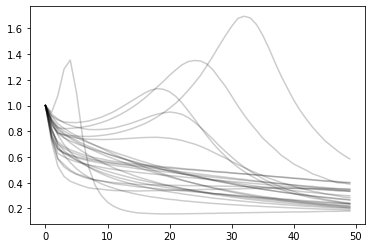

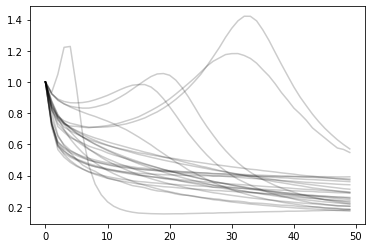

d2
99
99


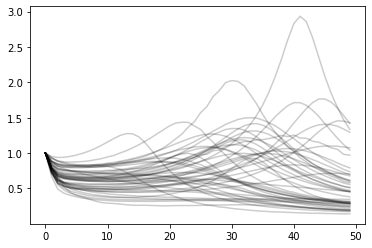

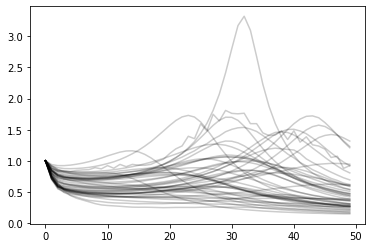

m1-ago
99
99


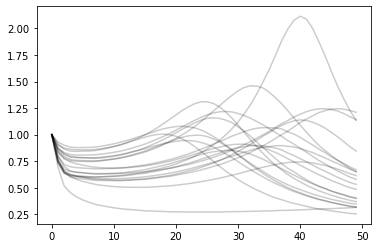

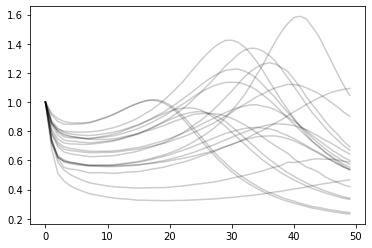

m1-ant
99
99


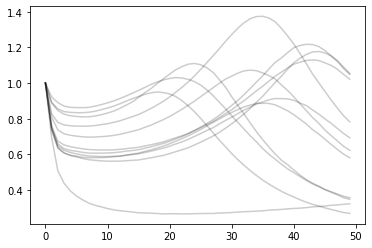

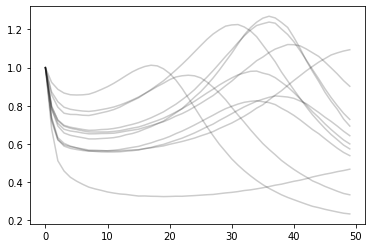

m1-ago+ant
99
99


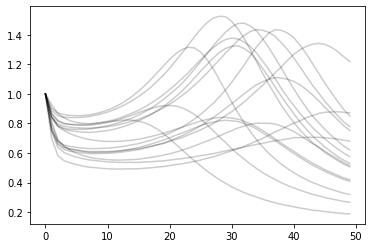

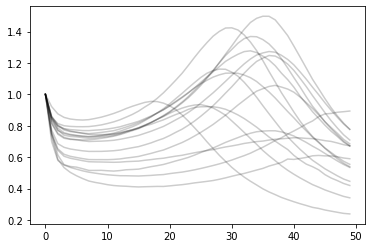

In [143]:
for i in  ['d1',  'd2' , 'm1-ago', 'm1-ant','m1-ago+ant', ]:
    print(i)
    acsf,drug = return_acsf_and_drug(exc_imp,cond=[i],joint=False)
    common_exps = set(acsf.exp_name) & set(drug.exp_name)
    acsf = acsf.drop_duplicates('exp_name')
    drug = drug.drop_duplicates('exp_name')
    acsf = acsf[acsf.exp_name.isin(common_exps)]

    drug = drug[drug.exp_name.isin(common_exps)]
    normed_acsf = normalizeBytheFirstValue(np.vstack(acsf['impedance']).T)[:50,:]

    normed_drug = normalizeBytheFirstValue(np.vstack(drug['impedance']).T)[:50,:]

    plt.plot(normed_drug,c='black',alpha=0.2)
    plt.show()
    
    plt.plot(normed_acsf,c='black',alpha=0.2)
    plt.show()

d1
99
99


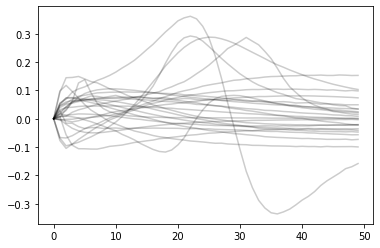

d2
99
99


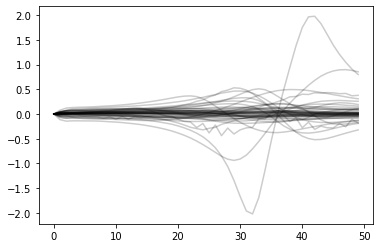

m1-ago
99
99


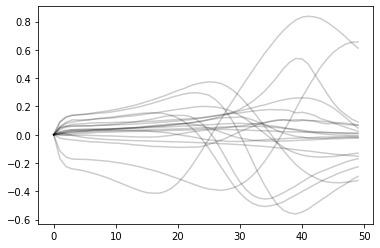

m1-ant
99
99


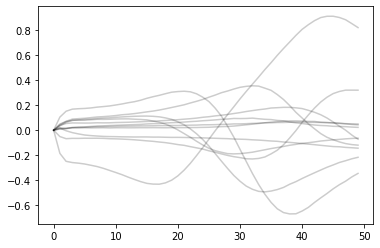

m1-ago+ant
99
99


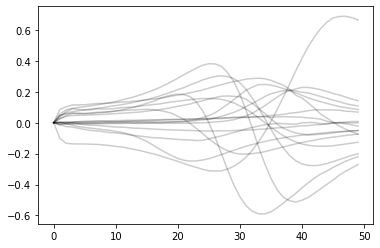

In [141]:
for i in  ['d1',  'd2' , 'm1-ago', 'm1-ant','m1-ago+ant', ]:
    print(i)
    acsf,drug = return_acsf_and_drug(exc_imp,cond=[i],joint=False)
    common_exps = set(acsf.exp_name) & set(drug.exp_name)
    acsf = acsf.drop_duplicates('exp_name')
    drug = drug.drop_duplicates('exp_name')
    acsf = acsf[acsf.exp_name.isin(common_exps)]

    drug = drug[drug.exp_name.isin(common_exps)]
    normed_acsf = normalizeBytheFirstValue(np.vstack(acsf['impedance']).T)[:50,:]

    normed_drug = normalizeBytheFirstValue(np.vstack(drug['impedance']).T)[:50,:]

    plt.plot(normed_drug-normed_acsf,c='black',alpha=0.2)
    plt.show()


d1
99
99


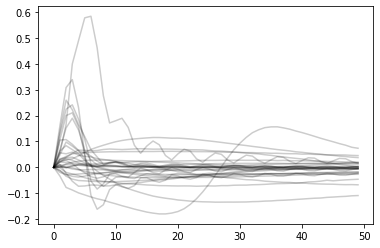

d2
99
99


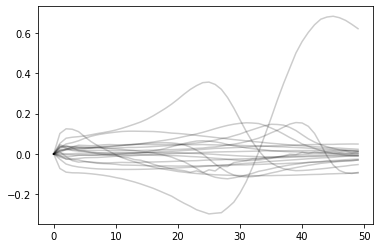

m1-ago
99
99


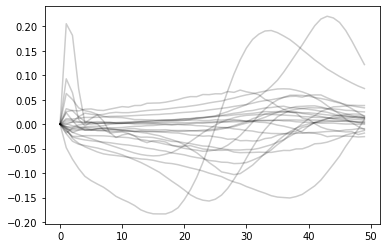

m1-ant
99
99


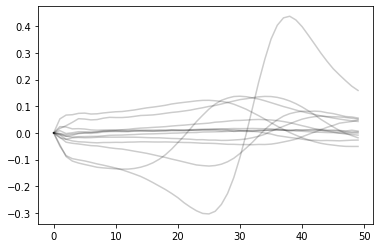

m1-ago+ant
99
99


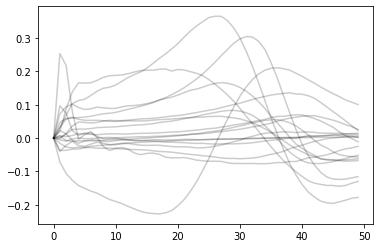

In [142]:
for i in   ['d1',  'd2' , 'm1-ago', 'm1-ant','m1-ago+ant' ]:
    print(i)
    acsf,drug = return_acsf_and_drug(inh_imp,cond=[i],joint=False)
    common_exps = set(acsf.exp_name) & set(drug.exp_name)
    acsf = acsf.drop_duplicates('exp_name')
    drug = drug.drop_duplicates('exp_name')
    acsf = acsf[acsf.exp_name.isin(common_exps)]

    drug = drug[drug.exp_name.isin(common_exps)]
    normed_acsf = normalizeBytheFirstValue(np.vstack(acsf['impedance']).T)[:50,:]

    normed_drug = normalizeBytheFirstValue(np.vstack(drug['impedance']).T)[:50,:]

    plt.plot(normed_drug-normed_acsf,c='black',alpha=0.2)
    plt.show()
